### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import tools
from numba.types import double, int32
from numba.experimental import jitclass
from scipy.interpolate import interp1d
from model import run_model
from params import par_class

plt.style.use('science') # pip install git+https://github.com/garrettj403/SciencePlots.git

### Settings

In [2]:
fast = True
save = True
num_points = 16
dpi = 400

### Figure 1: No uncertainty

Fraction of early payments: 0.000


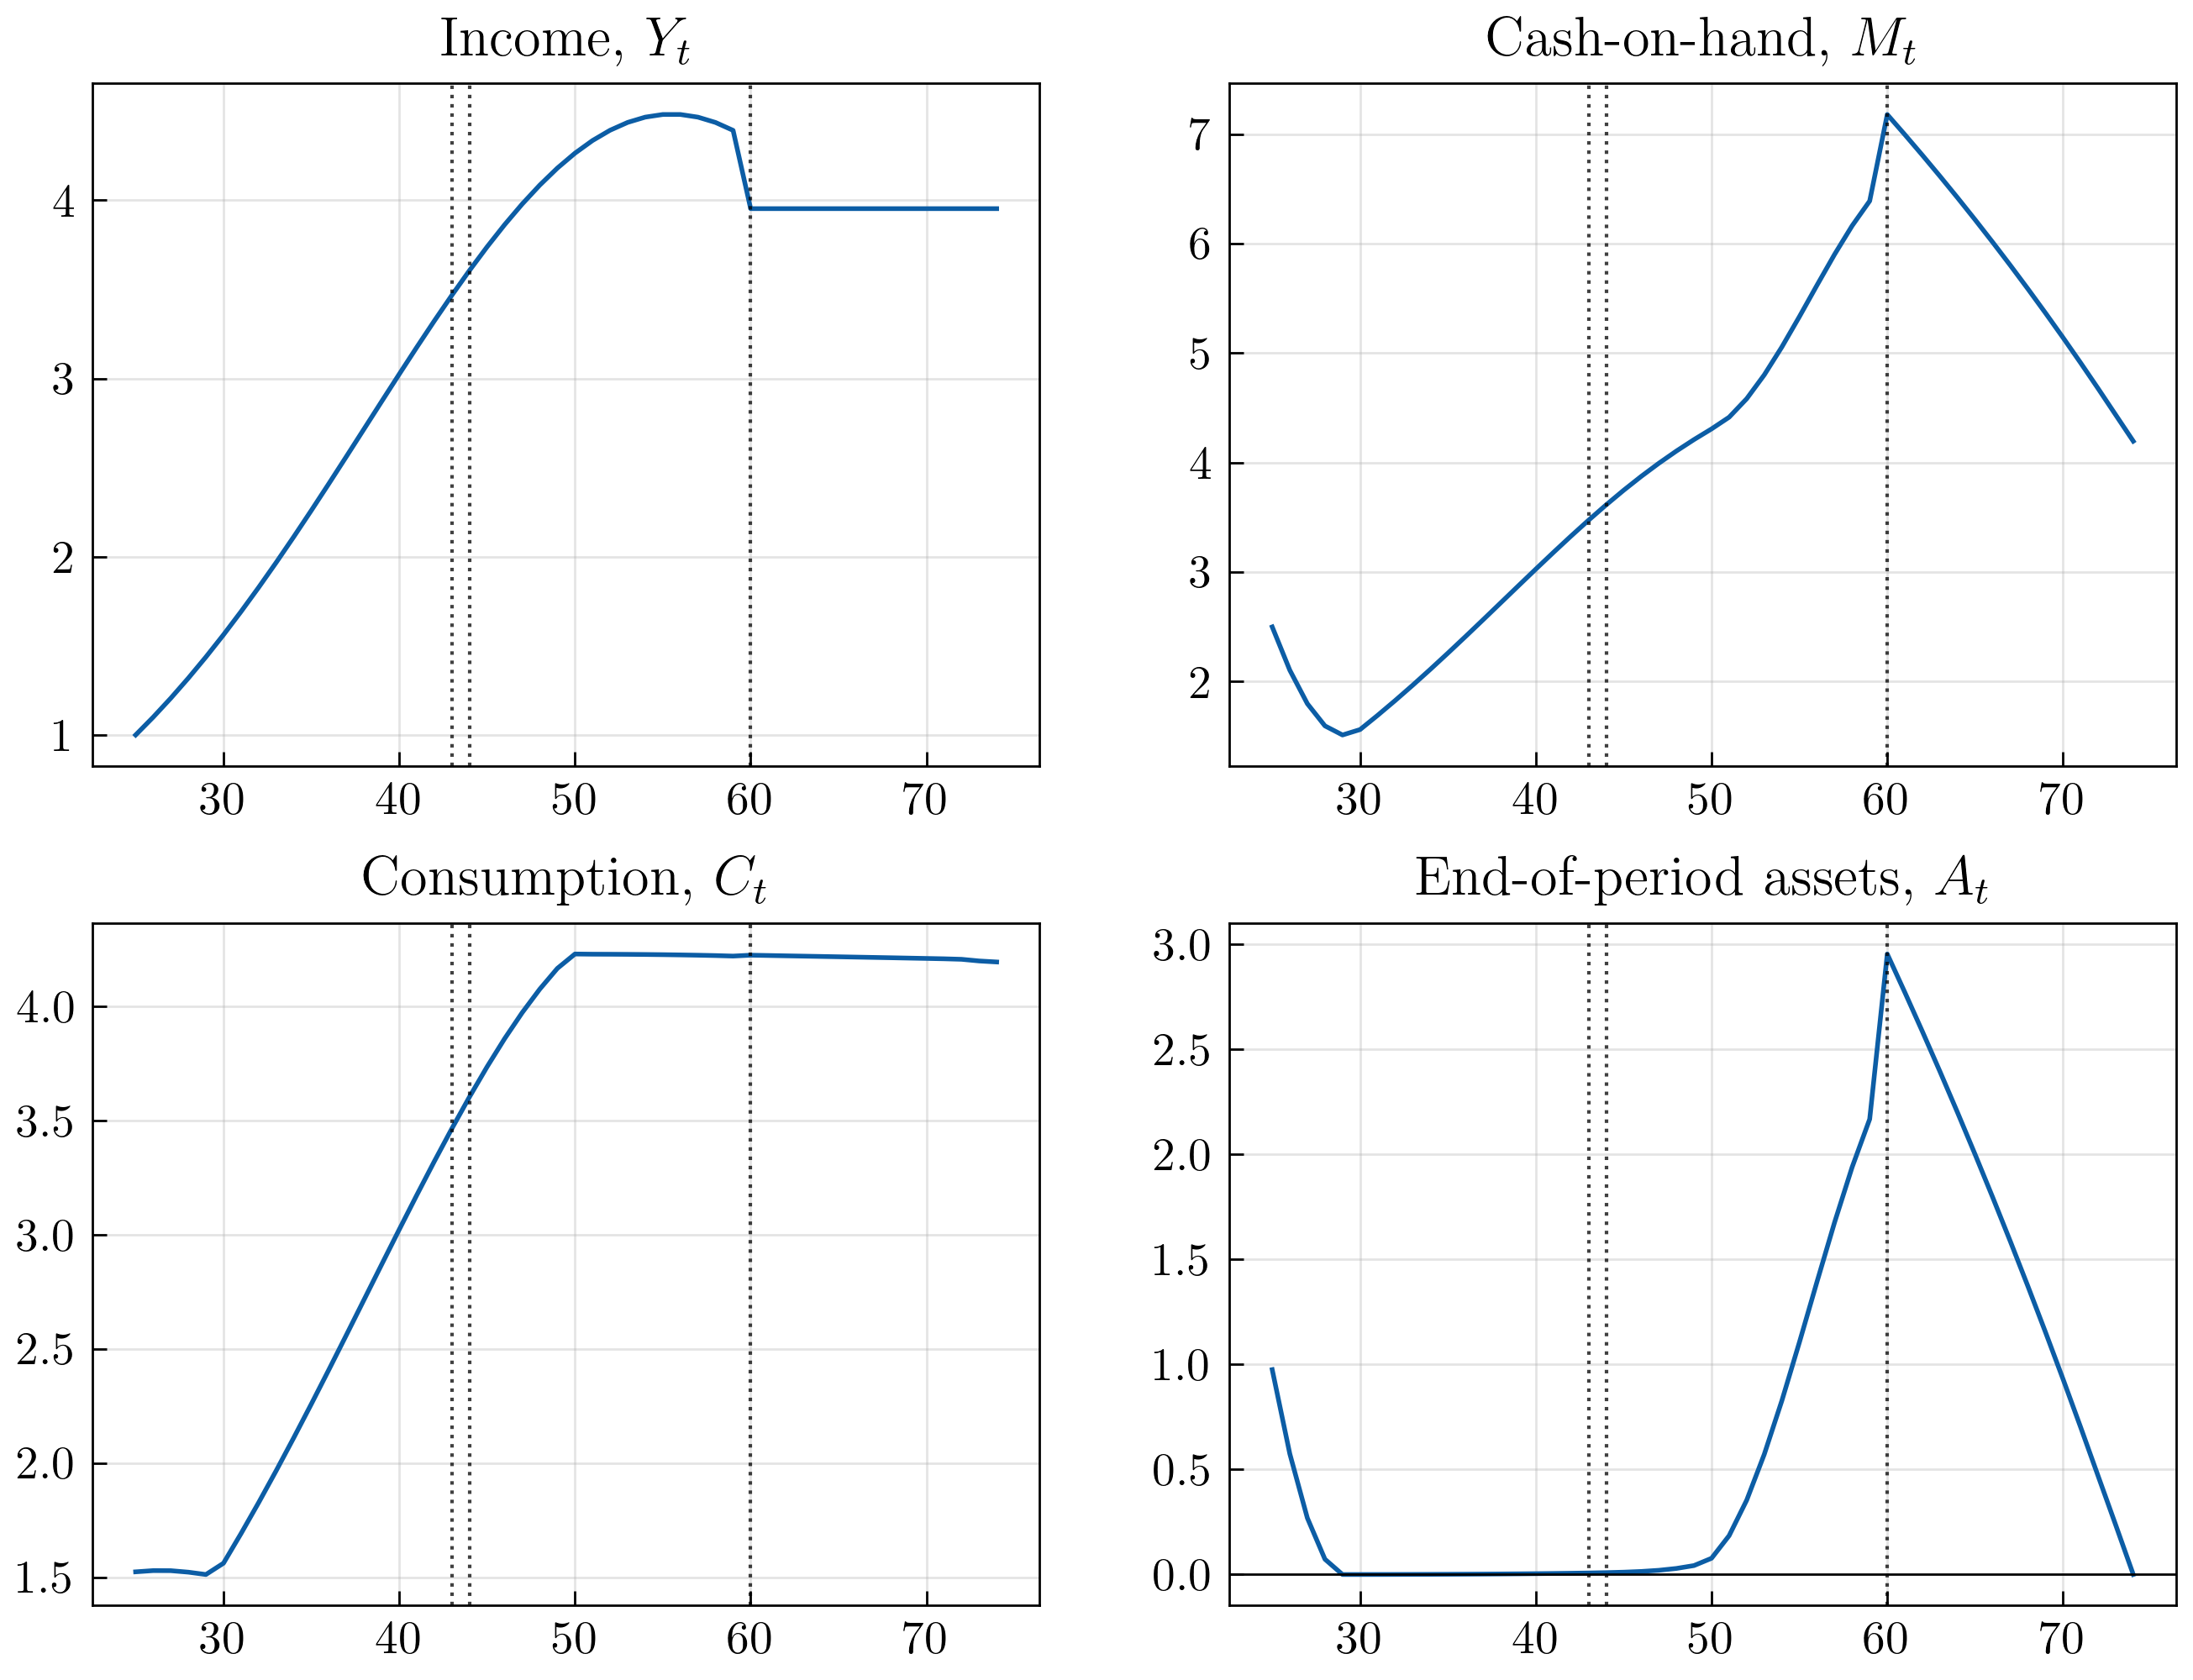

In [3]:
# Parameters
par = par_class()
par.pi = 0.0
par.sigma_d = 0.0
par.sigma_xi = 0.0
par.sigma_psi = 0.0
par.Nd = 1
par.Npsi = 1
par.Nxi = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(8,6),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0))
ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0))
ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0))
ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0))
ax[0,0].set_title('Income, $Y_t$')
ax[0,1].set_title('Cash-on-hand, $M_t$')
ax[1,0].set_title('Consumption, $C_t$')
ax[1,1].set_title('End-of-period assets, $A_t$')
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.23)
print(f'Fraction of early payments: {sim.z.mean():.3f}')
if save: plt.savefig(r'figs\fig1.png')

### Figure 2: Payouts as a function of $\delta$ and $R$

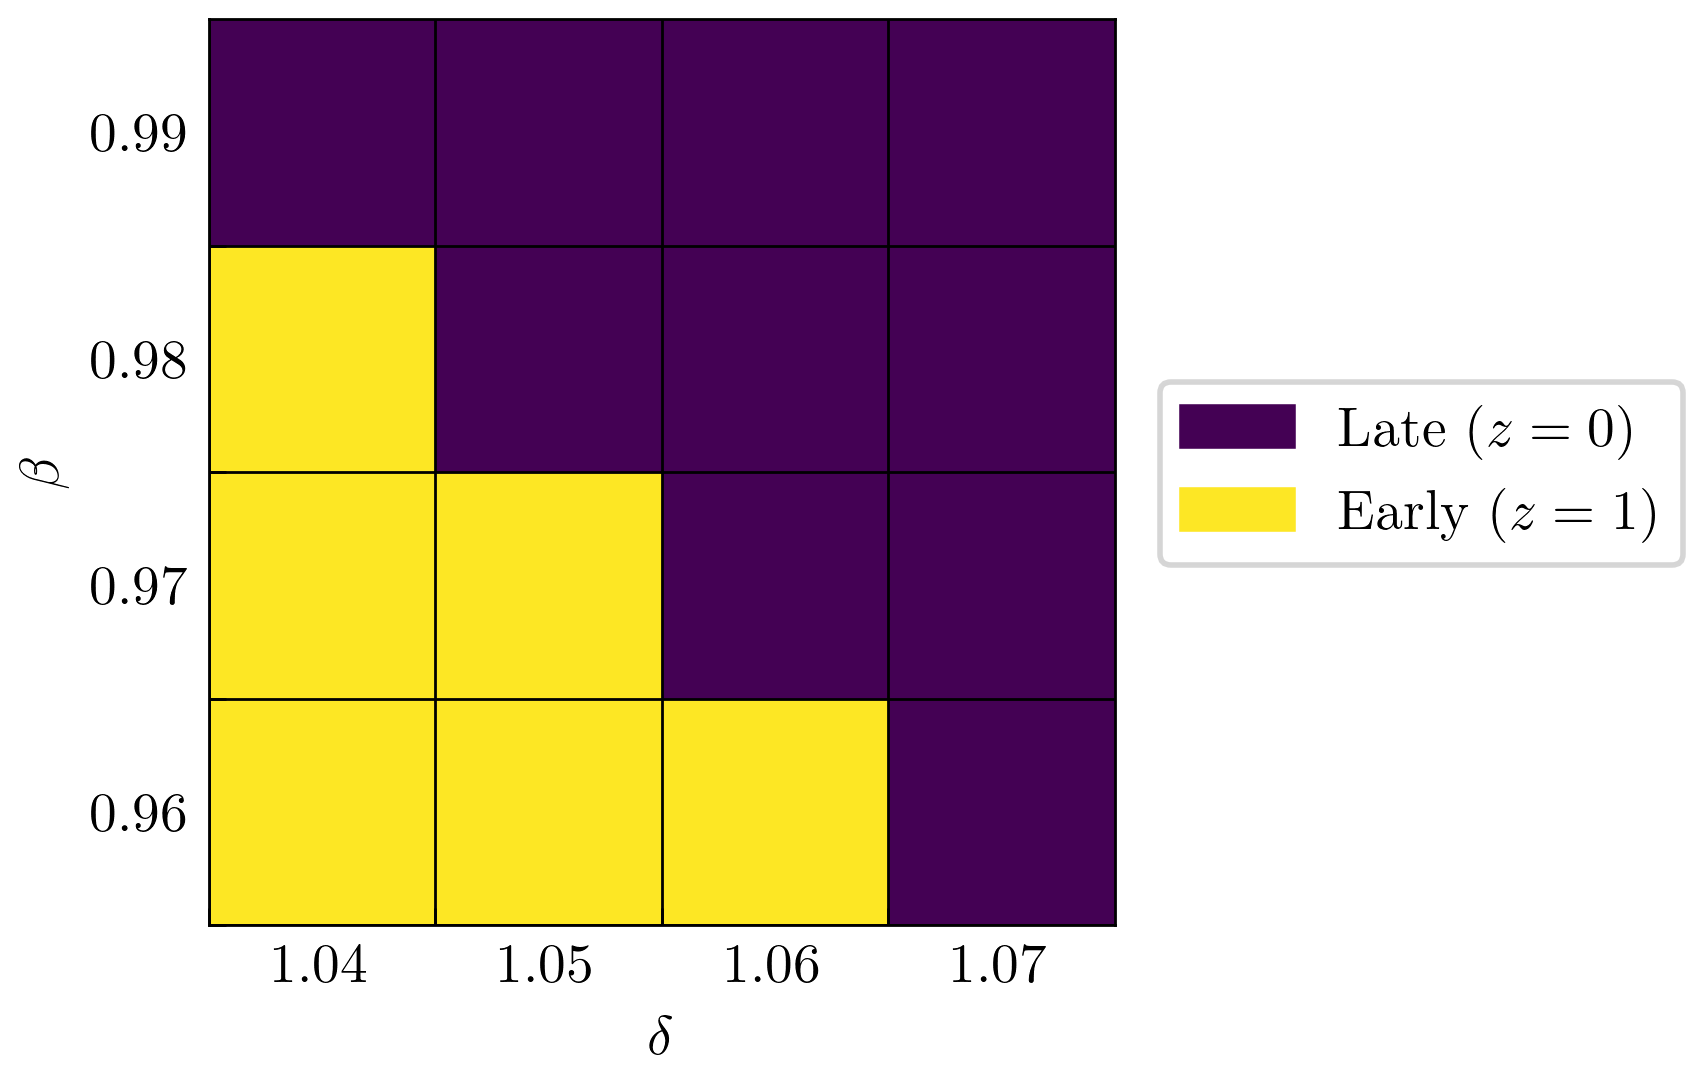

In [4]:
# Parameters
par = par_class()
par.pi = 0.0
par.sigma_d = 0.0
par.sigma_xi = 0.0
par.sigma_psi = 0.0
par.Nd = 1
par.Npsi = 1
par.Nxi = 1
par.simN = 1
if fast:
    par.Nm = 50
    par.Nh = 10
if True:
    par.Nm = 20
    par.Nh = 5

# Run models
n = 5
z = np.ones((n-1,n-1))
betas_flat = np.linspace(0.96, 0.99, n-1)
betas_flat_centered = (betas_flat + 0.005)
deltas_flat = np.linspace(1.04, 1.07, n-1)
deltas_flat_centered = (deltas_flat + 0.005)
for i,delta in enumerate(deltas_flat):
    for j,beta in enumerate(betas_flat):
        par.delta = delta
        par.beta = beta
        _, sim = run_model(par)
        z_mean = sim.z.mean()
        z[j,i] = z_mean
        
# Create figure
plt.figure(figsize=(4,3),dpi=dpi)
x = deltas_flat_centered
y = betas_flat_centered
extent = [x.min()-0.005, x.max()+0.005, y.min()-0.005, y.max()+0.005]
im = plt.imshow(z, interpolation="nearest", extent=extent, origin="lower")
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\beta$')
values = np.unique(z.ravel())
labels = []
for val in values:
    if int(val) == 0:
        labels.append('Late ($z=0$)')
    else:
        labels.append('Early ($z=1$)')
colors = [im.cmap(im.norm(value)) for value in values]
patches = [mpatches.Patch(color=colors[i], label=labels[i]) for i in range(len(labels))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 0.6), loc=2, borderaxespad=0., frameon=True)
plt.xticks(deltas_flat)
plt.xlim([1.04, 1.08])
plt.ylim([0.96, 1.00])
plt.yticks(betas_flat)
plt.grid(color='black')

#Hide major tick labels
ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.yaxis.set_major_formatter(ticker.NullFormatter())

# Customize minor tick labels
ax.xaxis.set_minor_locator(ticker.FixedLocator([1.045, 1.055, 1.065, 1.075]))
ax.xaxis.set_minor_formatter(ticker.FixedFormatter(['1.04','1.05','1.06','1.07']))
ax.yaxis.set_minor_locator(ticker.FixedLocator([0.965, 0.975, 0.985, 0.995]))
ax.yaxis.set_minor_formatter(ticker.FixedFormatter(['0.96','0.97','0.98','0.99']))
ax.tick_params(which='minor', length=0)
if save: plt.savefig(r'figs\fig2.png')

### Figure 3: With uncertainty

Fraction of early payments: 0.511


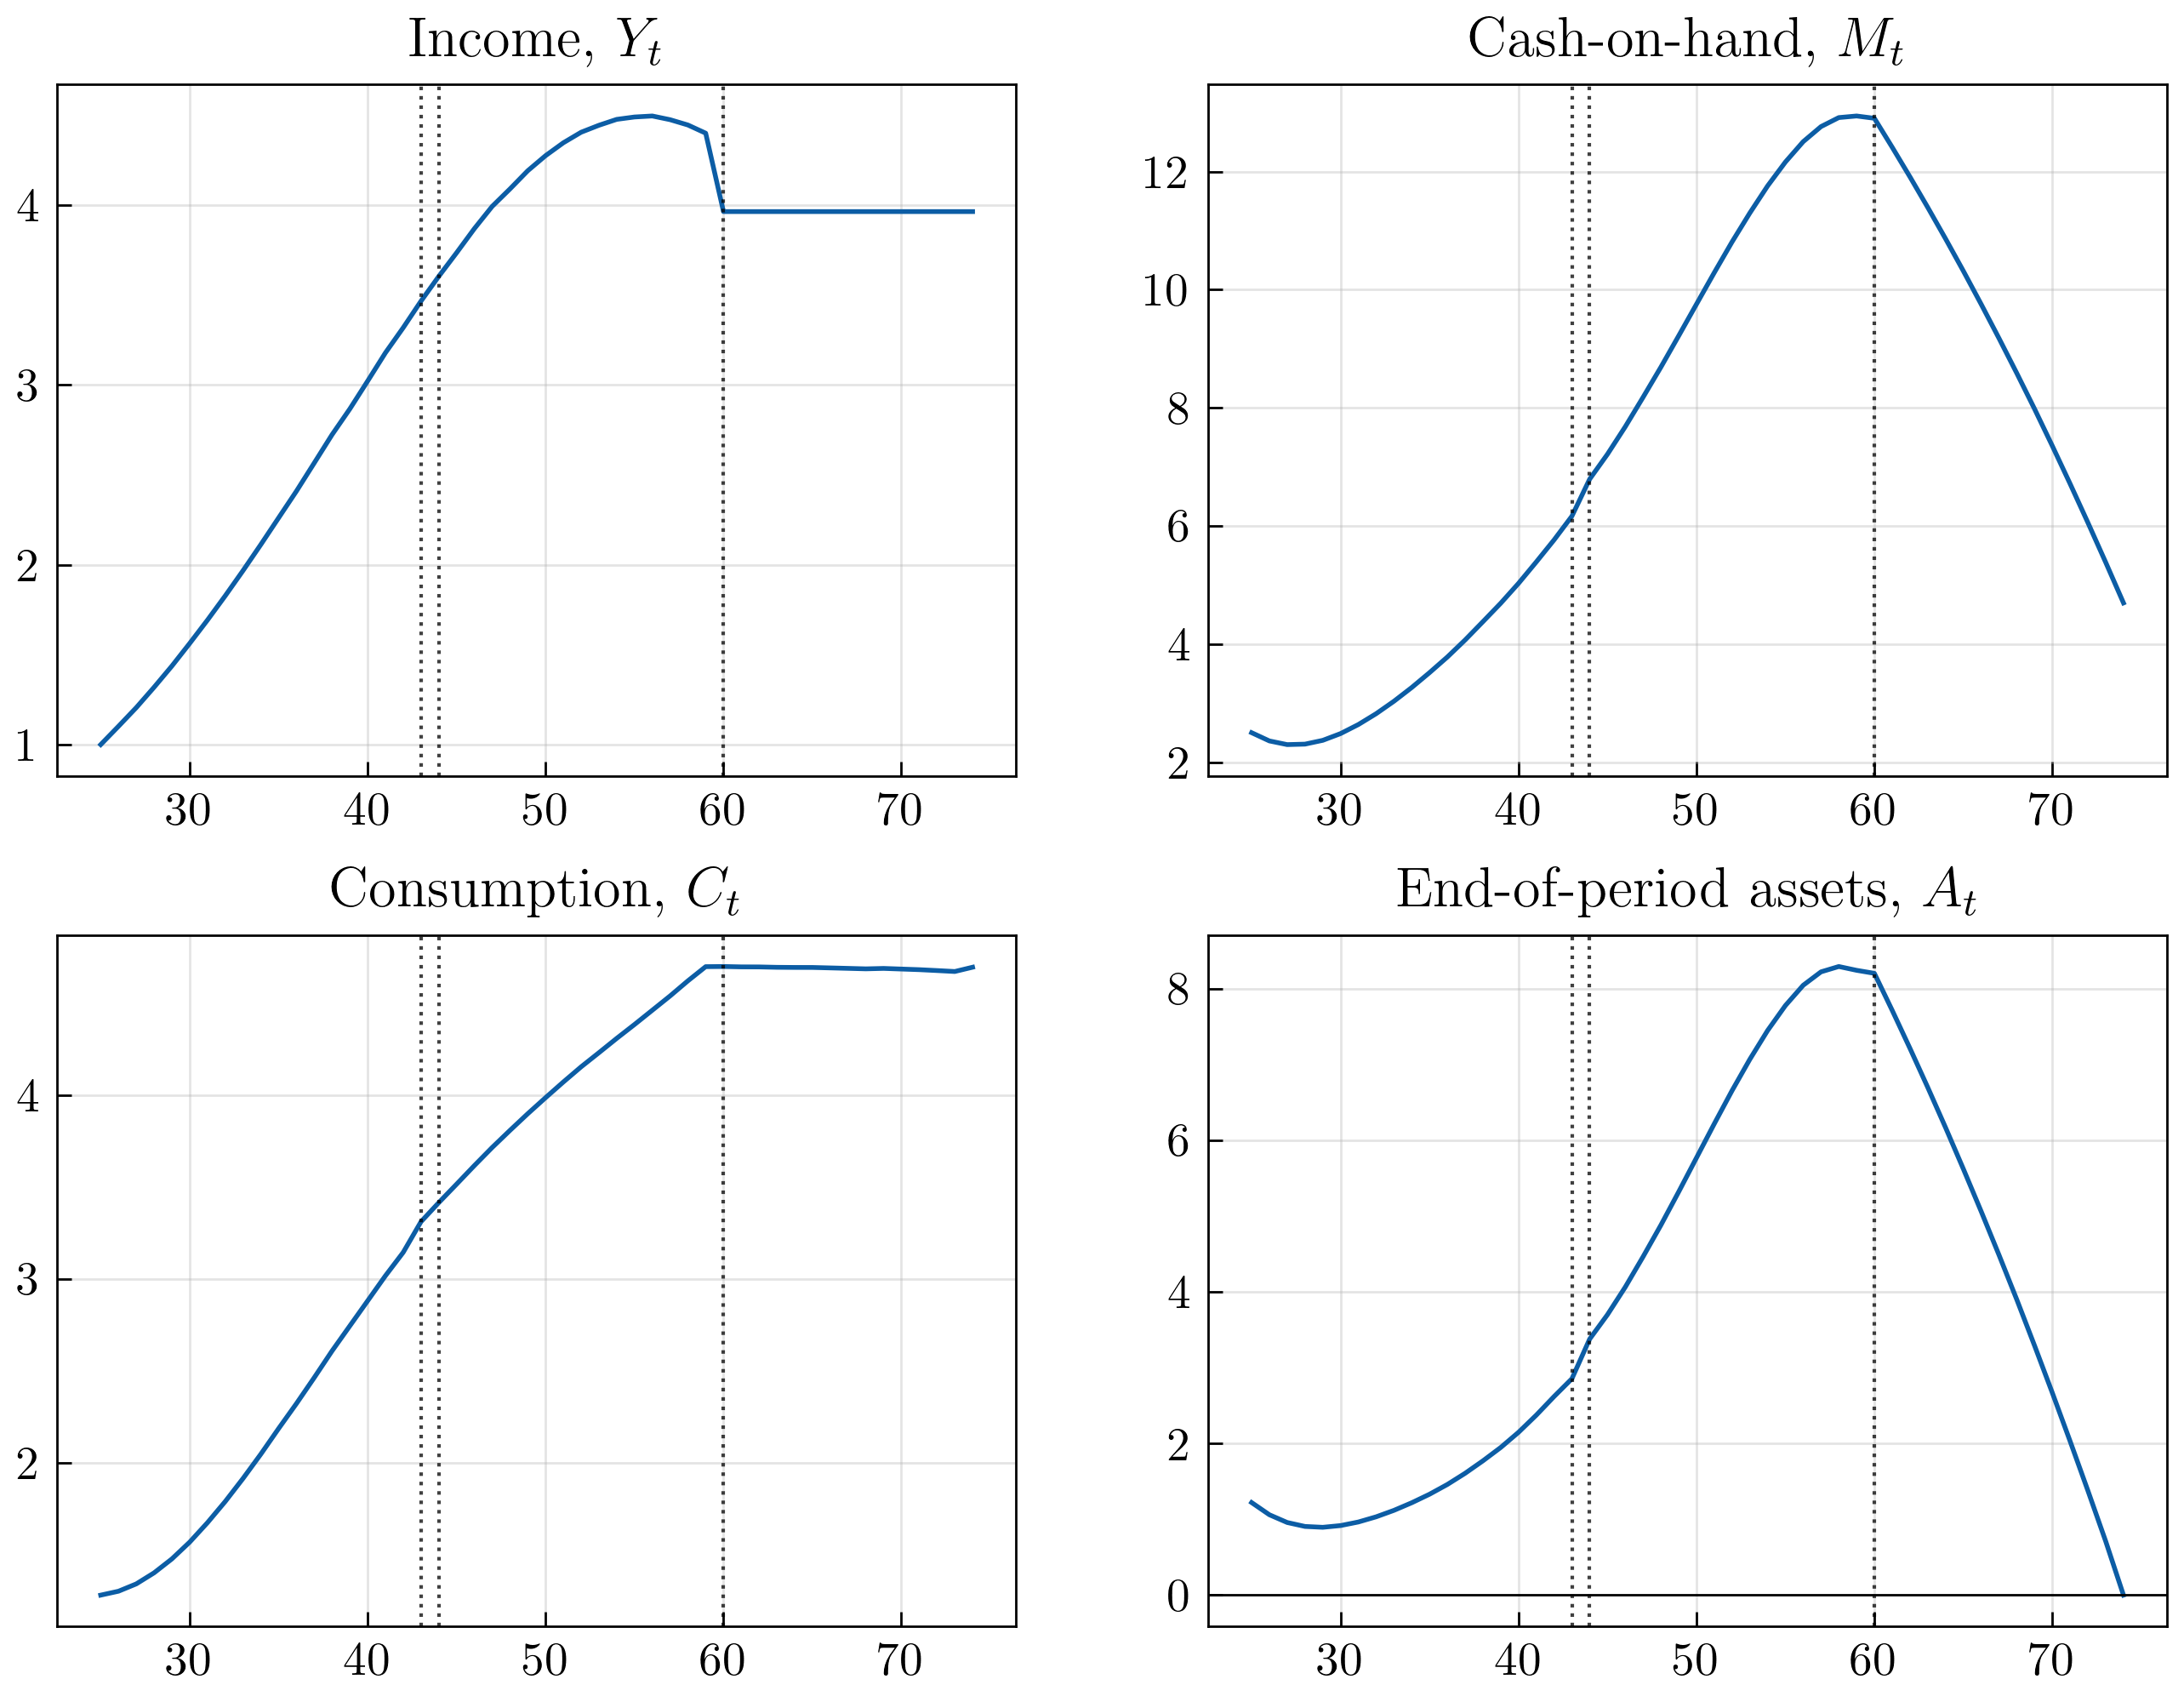

In [5]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(8,6),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim.Y.mean(axis=0))
ax[0,1].plot(range(25,par.T+25), sim.M.mean(axis=0))
ax[1,0].plot(range(25,par.T+25), sim.C.mean(axis=0))
ax[1,1].plot(range(25,par.T+25), sim.A.mean(axis=0))
ax[0,0].set_title('Income, $Y_t$')
ax[0,1].set_title('Cash-on-hand, $M_t$')
ax[1,0].set_title('Consumption, $C_t$')
ax[1,1].set_title('End-of-period assets, $A_t$')
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.23)
print(f'Fraction of early payments: {sim.z.mean():.3f}')
if save: plt.savefig(r'figs\fig3.png')

### Figure 4: Age profile

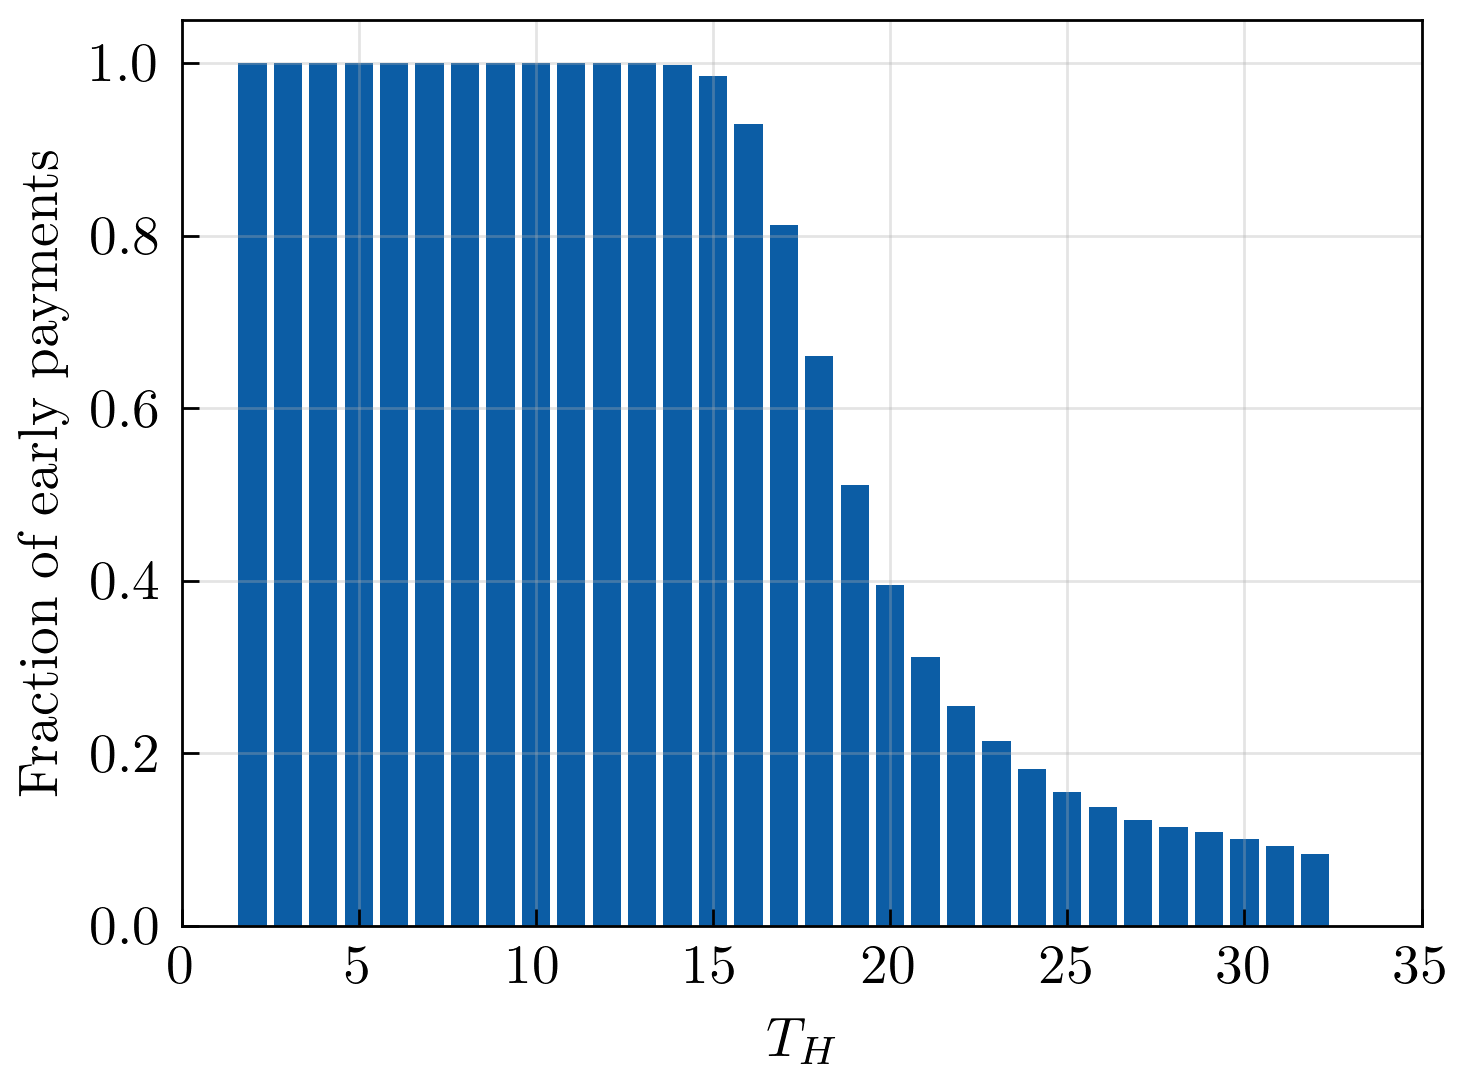

In [6]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
    
# Run models
zs = []
THs = np.linspace(2,32,31,dtype=int)
for TH in THs:
    par.TH = TH
    _, sim = run_model(par)
    z_mean = sim.z.mean()
    zs.append(z_mean)
    
# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.bar(THs,zs)
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlim([0,35])
plt.xlabel('$T_H$')
plt.ylabel('Fraction of early payments')
if save: plt.savefig(r'figs\fig4.png')

### Calculation 1: MPC

In [7]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10
    
# Calculate consumption and holiday pay for people consuming early
_, sim = run_model(par)
N_early = sum(sim.z)
sim_C_early = np.nan + np.zeros((N_early,par.T))
sim_H_early  = np.nan + np.zeros((N_early,par.T))
i_early = 0
i_earlies = []
for i,z_i in enumerate(sim.z):
    if z_i == 1:
        i_earlies.append(i)
        sim_C_early[i_early,:] = sim.C[i,:]
        sim_H_early[i_early,:] = sim.H[i,:]
        i_early = i_early + 1
sim_C_total_w = sim_C_early[:,par.TH-1].sum(axis=0) + sim_C_early[:,par.TH].sum(axis=0)
H_total = sim_H_early[:,par.TH-1].sum(axis=0)

# Colculate consumption and holiday pay for people who would have consumed early
par.z_mode = 0
_, sim = run_model(par)
sim_C_total_wo = 0.0
for i in i_earlies:
    sim_C_total_wo += sim.C[i,par.TH-1] + sim.C[i,par.TH]
mpc_selection = (sim_C_total_w - sim_C_total_wo)/H_total

# Colculate 
sim_C_total_both_wo = sim.C[:,par.TH-1].sum(axis=0) + sim.C[:,par.TH].sum(axis=0)

# Colculate consumption forcing early payments
par.z_mode = 1
_, sim = run_model(par)
sim_C_total_both_w = sim.C[:,par.TH-1].sum(axis=0) + sim.C[:,par.TH].sum(axis=0)
H_total_both = sim.H[:,par.TH-1].sum(axis=0)
mpc_forced = (sim_C_total_both_w - sim_C_total_both_wo)/H_total_both

print(f'MPC with self-selection:  {mpc_selection:.3f}')
print(f'MPC with forced payments: {mpc_forced:.3f}')

MPC with self-selection:  0.313
MPC with forced payments: 0.231


### Figure 5: Exogenous holiday pay timing

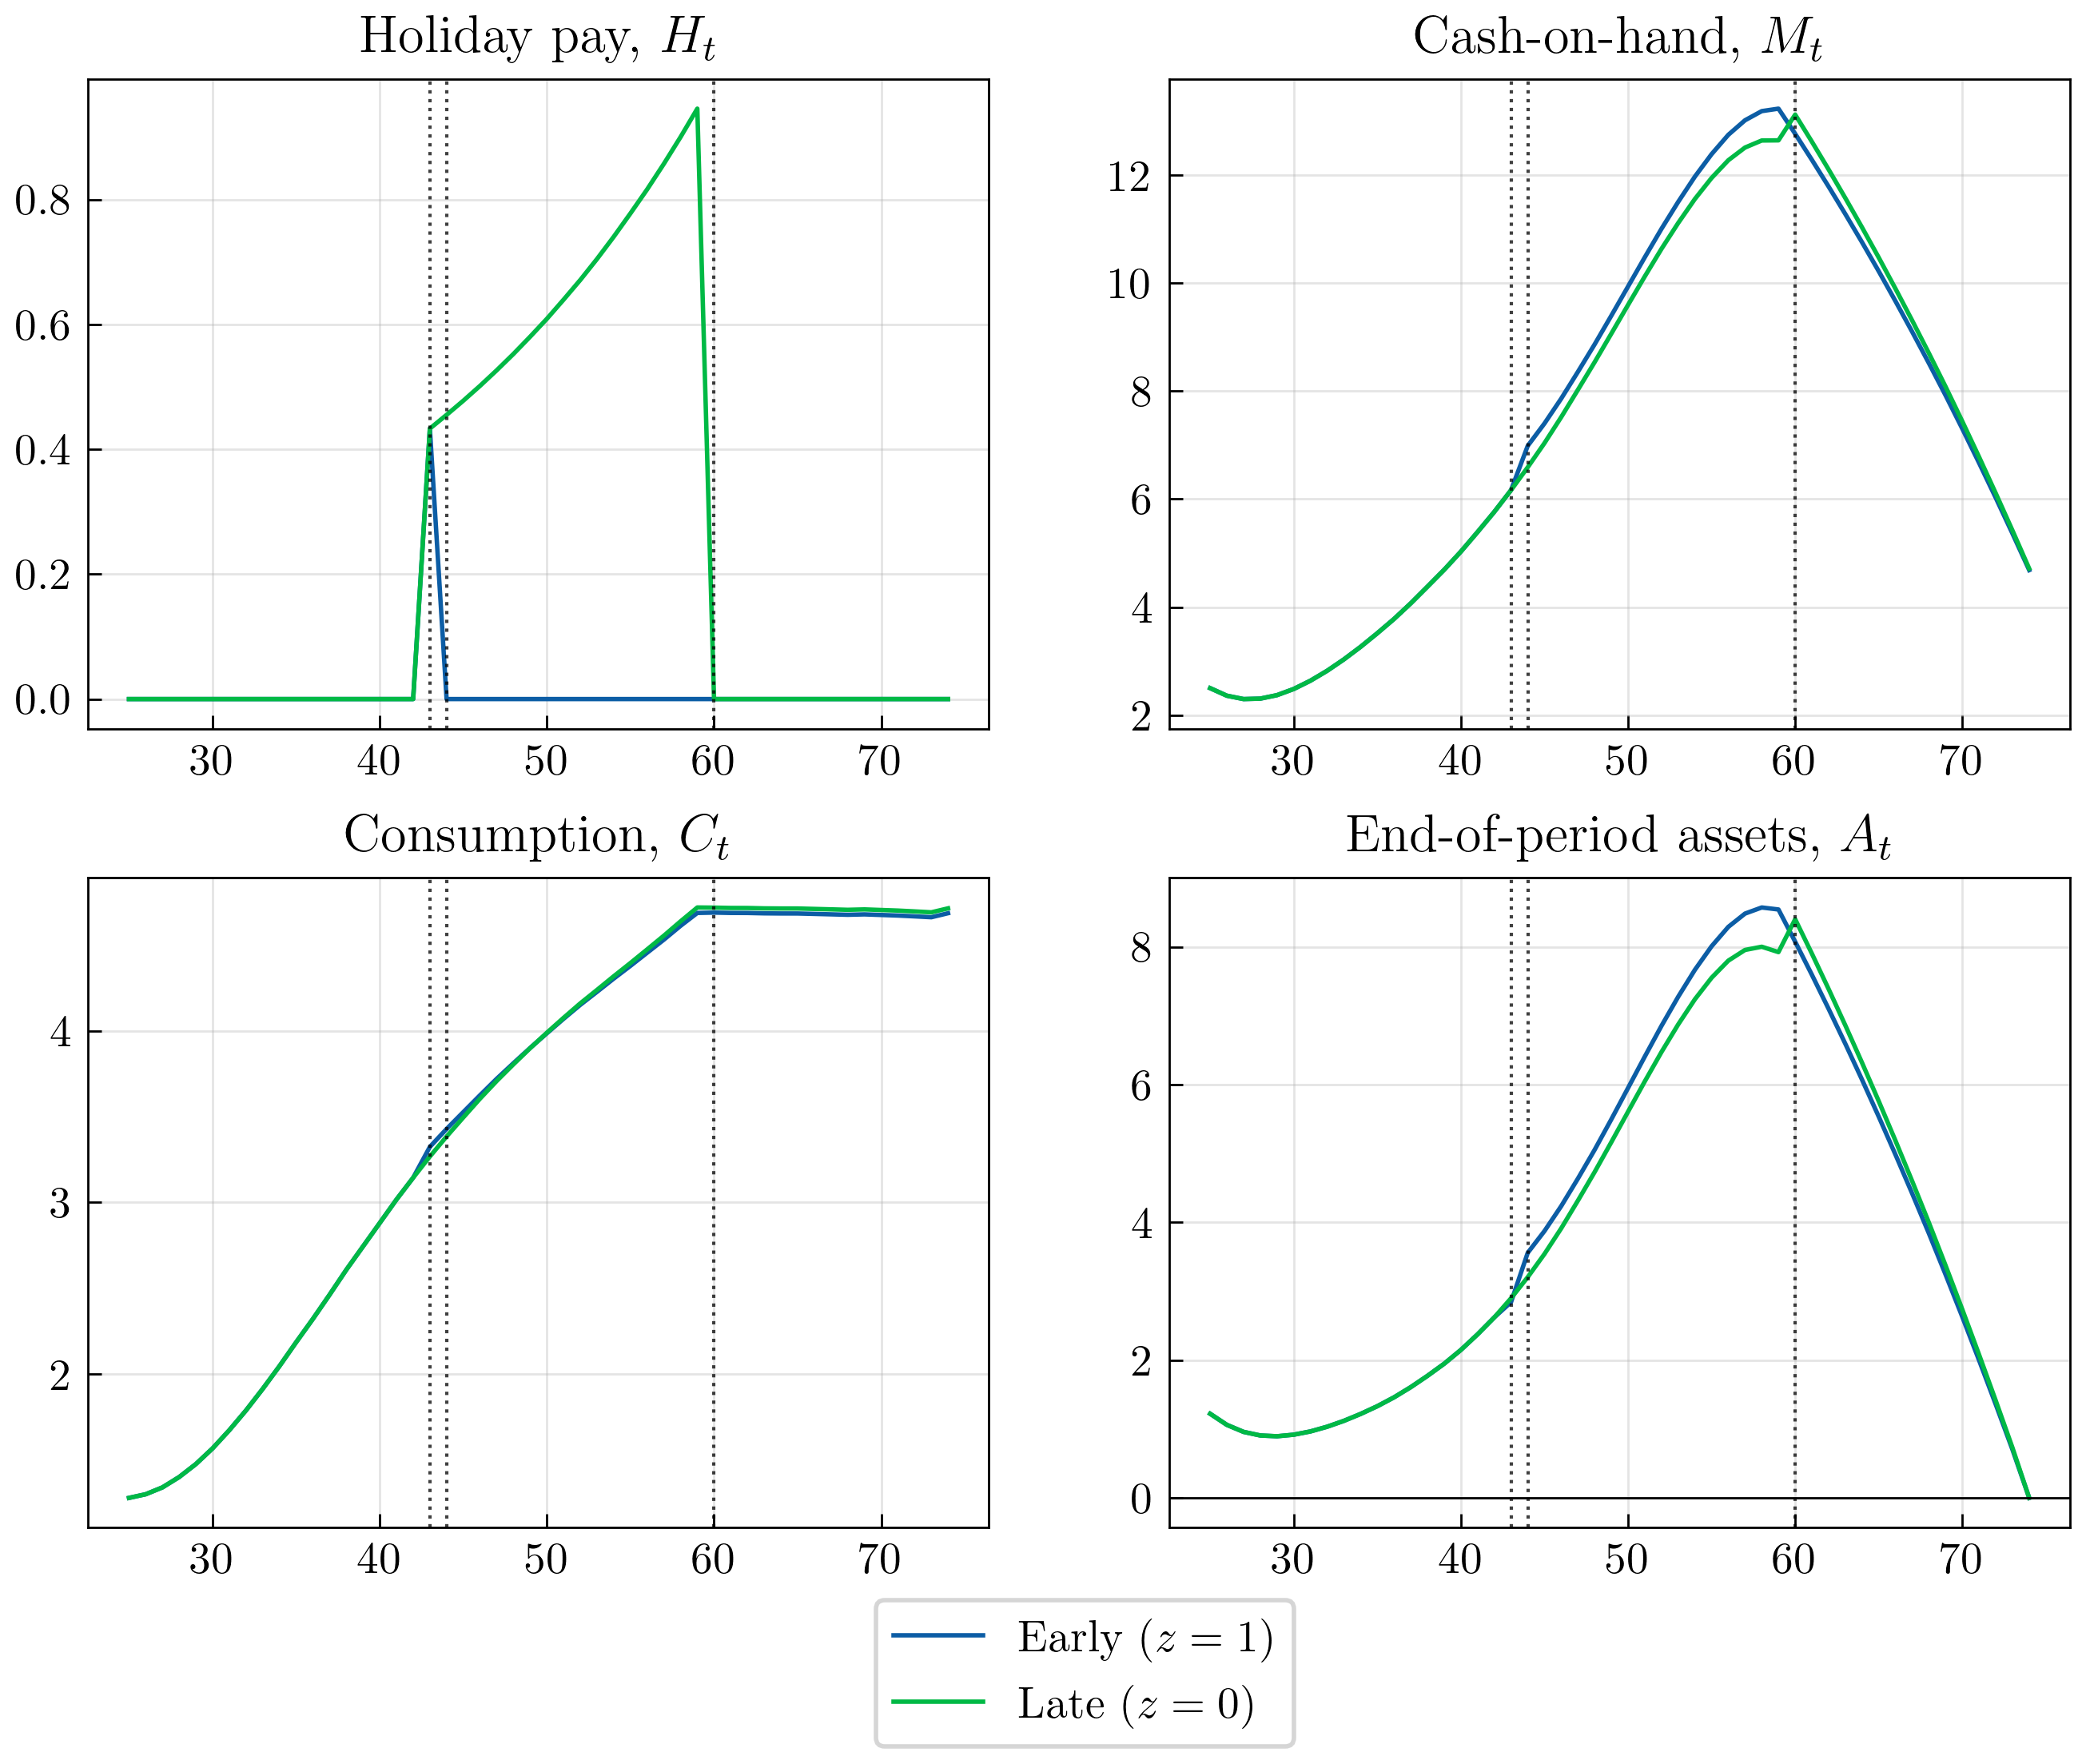

In [8]:
# Parameters
par = par_class()
par.z_mode = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim_early = run_model(par)
par.z_mode = 0
_, sim_late = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(8,6),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim_early.H.mean(axis=0), label='Early ($z=1$)')
ax[0,0].plot(range(25,par.T+25), sim_late.H.mean(axis=0), label='Late ($z=0$)')
ax[0,1].plot(range(25,par.T+25), sim_early.M.mean(axis=0), label='Early ($z=1$)')
ax[0,1].plot(range(25,par.T+25), sim_late.M.mean(axis=0), label='Late ($z=0$)')
ax[1,0].plot(range(25,par.T+25), sim_early.C.mean(axis=0), label='Early ($z=1$)')
ax[1,0].plot(range(25,par.T+25), sim_late.C.mean(axis=0), label='Late ($z=0$)')
ax[1,1].plot(range(25,par.T+25), sim_early.A.mean(axis=0), label='Early ($z=1$)')
ax[1,1].plot(range(25,par.T+25), sim_late.A.mean(axis=0), label='Late ($z=0$)')
ax[0,0].set_title('Holiday pay, $H_t$')
ax[0,1].set_title('Cash-on-hand, $M_t$')
ax[1,0].set_title('Consumption, $C_t$')
ax[1,1].set_title('End-of-period assets, $A_t$')
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.23)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.42,0.01), frameon=True)
if save: plt.savefig(r'figs\fig5.png')

### Figure 6: Endogenous holiday pay timining

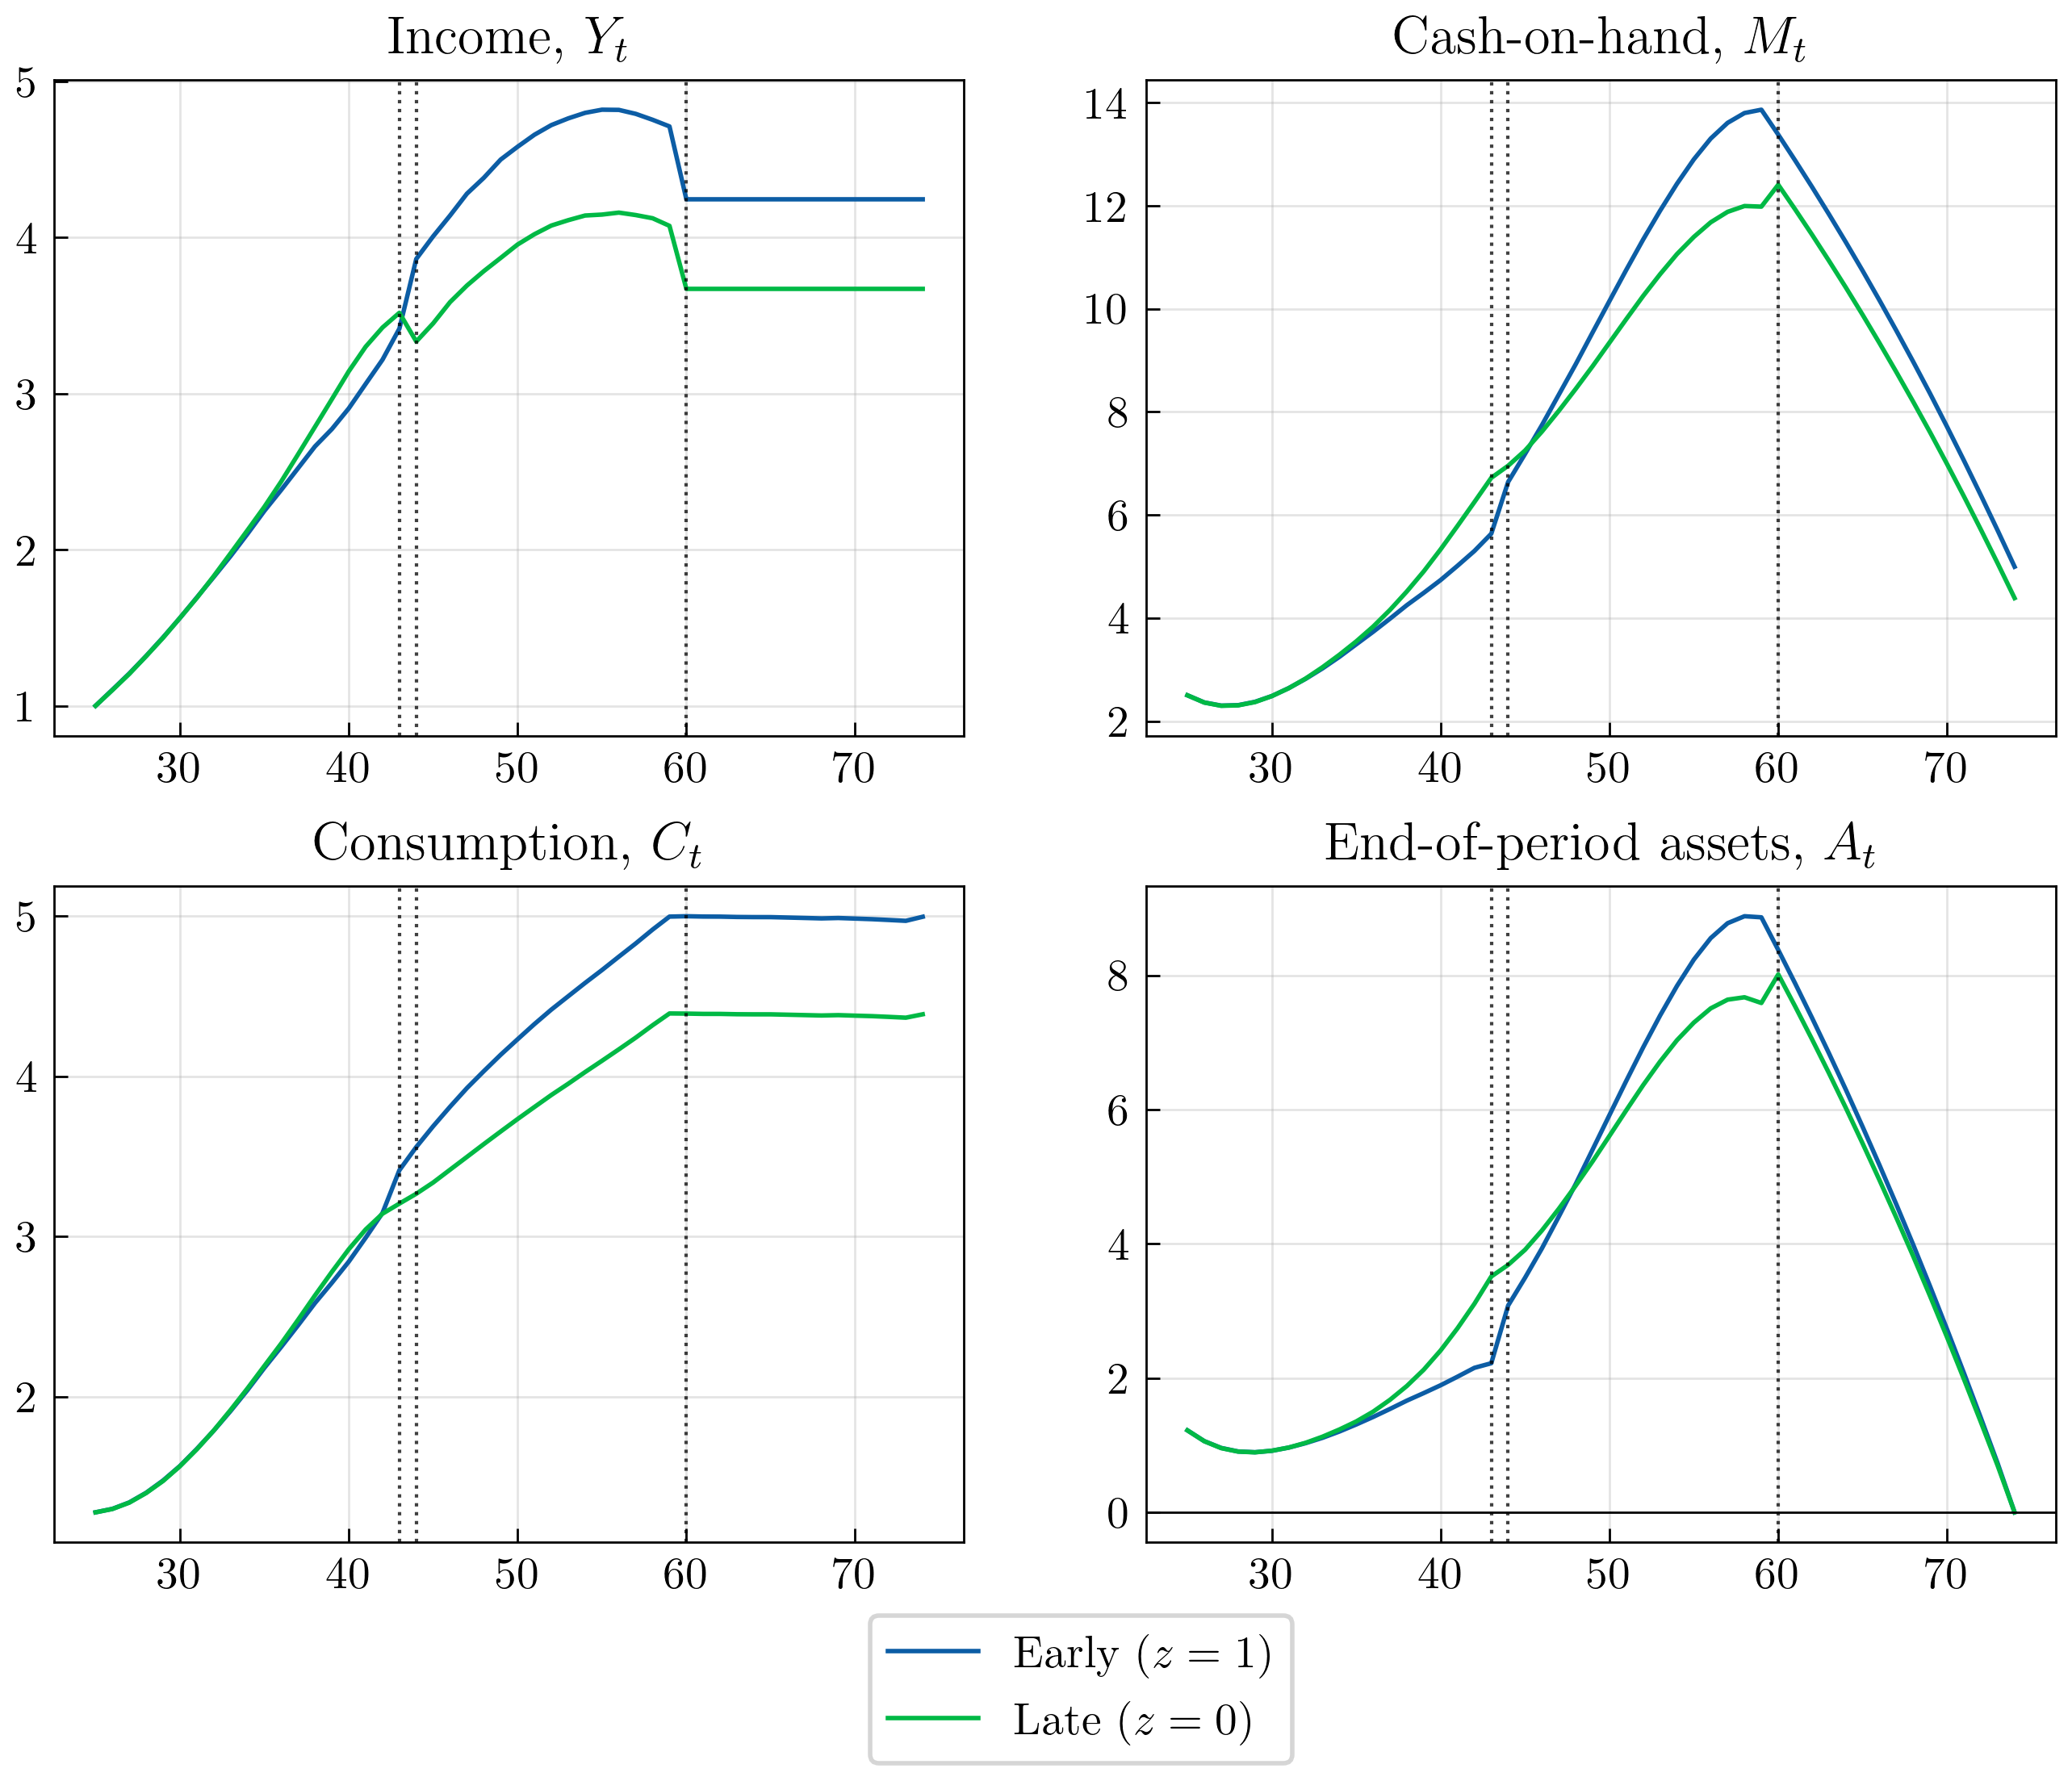

In [9]:
# Parameters
par = par_class()
if fast:
    par.Nm = 50
    par.Nh = 10

# Model
_, sim = run_model(par)

# Seperate time series for early and late payments
N_early = sum(sim.z)
N_late  = par.simN - N_early
sim_Y_early = np.nan + np.zeros((N_early,par.T))
sim_Y_late  = np.nan + np.zeros((N_late,par.T))
sim_M_early = np.nan + np.zeros((N_early,par.T))
sim_M_late  = np.nan + np.zeros((N_late,par.T))
sim_C_early = np.nan + np.zeros((N_early,par.T))
sim_C_late  = np.nan + np.zeros((N_late,par.T))
sim_A_early = np.nan + np.zeros((N_early,par.T))
sim_A_late  = np.nan + np.zeros((N_late,par.T))
i_early = 0
i_late  = 0
for i,z_i in enumerate(sim.z):
    if z_i == 1:
        sim_Y_early[i_early,:] = sim.Y[i,:]
        sim_M_early[i_early,:] = sim.M[i,:]
        sim_C_early[i_early,:] = sim.C[i,:]
        sim_A_early[i_early,:] = sim.A[i,:]
        i_early = i_early + 1
    else:
        sim_Y_late[i_late,:] = sim.Y[i,:]
        sim_M_late[i_late,:] = sim.M[i,:]
        sim_C_late[i_late,:] = sim.C[i,:]
        sim_A_late[i_late,:] = sim.A[i,:]
        i_late = i_late + 1

# Plot
fig,ax = plt.subplots(2,2,figsize=(8,6),dpi=dpi)
ax[0,0].plot(range(25,par.T+25), sim_Y_early.mean(axis=0), label='Early ($z=1$)')
ax[0,0].plot(range(25,par.T+25), sim_Y_late.mean(axis=0), label='Late ($z=0$)')
ax[0,1].plot(range(25,par.T+25), sim_M_early.mean(axis=0), label='Early ($z=1$)')
ax[0,1].plot(range(25,par.T+25), sim_M_late.mean(axis=0), label='Late ($z=0$)')
ax[1,0].plot(range(25,par.T+25), sim_C_early.mean(axis=0), label='Early ($z=1$)')
ax[1,0].plot(range(25,par.T+25), sim_C_late.mean(axis=0), label='Late ($z=0$)')
ax[1,1].plot(range(25,par.T+25), sim_A_early.mean(axis=0), label='Early ($z=1$)')
ax[1,1].plot(range(25,par.T+25), sim_A_late.mean(axis=0), label='Late ($z=0$)')
ax[0,0].set_title('Income, $Y_t$')
ax[0,1].set_title('Cash-on-hand, $M_t$')
ax[1,0].set_title('Consumption, $C_t$')
ax[1,1].set_title('End-of-period assets, $A_t$')
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].axvline(x=par.TH-1+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TH+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].axvline(x=par.TR+25, color='black', alpha=3/4, ls=':', lw=3/4)
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.23)
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc=(0.42,0.01), frameon=True)
if save: plt.savefig(r'figs\fig6.png')

# Unused figures:

### Bonus: Standard Buffer-Stock

In [ ]:
# Parameters
par = par_class()
par.alpha = 0.0
par.sigma_d = 0.0
par.Nh = 2
par.Nd = 1
if fast:
    par.Nm = 50

# Model
_, sim = run_model(par)

# Plot
fig,ax = plt.subplots(2,2,figsize=(8,6),dpi=dpi)
ax[0,0].plot(range(25,80), sim.Y.mean(axis=0))
ax[0,1].plot(range(25,80), sim.M.mean(axis=0))
ax[1,0].plot(range(25,80), sim.C.mean(axis=0))
ax[1,1].plot(range(25,80), sim.A.mean(axis=0))
ax[0,0].set_title('Income, $Y_t$')
ax[0,1].set_title('Cash-on-hand, $M_t$')
ax[1,0].set_title('Consumption, $C_t$')
ax[1,1].set_title('End-of-period assets, $A_t$')
for i in [0,1]:
    for j in [0,1]:
        ax[i,j].grid(alpha=1/3) # Make grid
        ax[i,j].minorticks_off() # Remove minor ticks
        ax[i,j].tick_params(top=False, right=False) # Remove major ticks on top and right 
        if (i,j) == (1,1): ax[i,j].axhline(0,color='black',alpha=1,lw=0.5) # Add zero line
fig.subplots_adjust(hspace=0.23)

### Bonus: Payouts as a function of $\delta$

In [ ]:
# Parameters
ar = par_class()
par.sigma_psi = 0.0
par.sigma_d = 0.0
par.Nd = 1
par.Npsi = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Run models
deltas = np.linspace(1.04, 1.08, num_points)
zs = []
for delta in deltas:
    par.delta = delta
    _, sim = run_model(par)
    zs.append(sim.z.mean())

# Interpolate
interpolator = interp1d(deltas, zs, kind='cubic')
deltas_interp = np.linspace(1.04, 1.08, num=200, endpoint=True)
zs_interp = interpolator(deltas_interp)

# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(deltas_interp,zs_interp)
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel('$\delta$')
plt.ylabel('Fraction of early payments')

### Bonus: Payouts as a function of $\sigma_{\xi}$

In [ ]:
# Parameters
par = par_class()
par.sigma_psi = 0.0
par.sigma_d = 0.0
par.Nd = 1
par.Npsi = 1
par.Nxi = 12
if fast:
    par.Nm = 50
    par.Nh = 10

# Run models
zs = []
sigma_xis = tools.nonlinspace(0, 2, num_points, 1.5)
for sigma_xi in sigma_xis:
    par.sigma_xi = sigma_xi
    _, sim = run_model(par)
    zs.append(sim.z.mean())

# Interpolate
interpolator = interp1d(sigma_xis, zs, kind='linear')
sigma_xis_interp = np.linspace(0.0, 2.0, num=200, endpoint=True)
zs_interp = interpolator(sigma_xis_interp)

# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(sigma_xis_interp,zs_interp)
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel('$\sigma_{xi}$')
plt.ylabel('Fraction of early payments')

### Bonus: Payouts as a function of $\beta$

In [ ]:
# Parameters
par = par_class()
par.sigma_psi = 0.0
par.sigma_d = 0.0
par.Nd = 1
par.Npsi = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Run models
zs = []
betas = np.linspace(0.94, 0.98, num_points)
for beta in betas:
    par.beta = beta
    _, sim = run_model(par)
    zs.append(sim.z.mean())

# Interpolate
interpolator = interp1d(betas, zs, kind='cubic')
betas_interp = np.linspace(0.94, 0.98, num=200, endpoint=True)
zs_interp = interpolator(betas_interp)

# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(betas_interp,zs_interp)
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel(r'$\beta$')
plt.ylabel('Fraction of early payments')

### Bonus: Payouts as a function of $R$

In [ ]:
# Parameters
par = par_class()
par.sigma_psi = 0.0
par.sigma_d = 0.0
par.Nd = 1
par.Npsi = 1
if fast:
    par.Nm = 50
    par.Nh = 10

# Run models
zs = []
Rs = np.linspace(0.90, 1.06, num_points)
for R in Rs:
    par.R = R
    _, sim = run_model(par)
    zs.append(sim.z.mean())

# Interpolate
interpolator = interp1d(Rs, zs, kind='linear')
Rs_interp = np.linspace(0.90, 1.06, num=200, endpoint=True)
zs_interp = interpolator(Rs_interp)

# Graph
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(Rs_interp,zs_interp)
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel('$R$')
plt.ylabel('Fraction of early payments')

### Bonus: (Inverse ratio) value function at $t=T_H-1$ as a function of early payment indicator

In [ ]:
# Parameters
par = par_class()
par.sigma_psi = 0.0
par.sigma_d = 0.0
par.Nd = 1
par.Npsi = 1
par.Nh = 21 # Ensures that element number 2 in grid_h is 0.1
par.h_phi = 1.0
if fast:
    par.Nm = 50

# Run model
sol, sim = run_model(par)

# Graph
grid_m = tools.nonlinspace(1e-6,par.m_max,par.Nm,par.m_phi)
plt.figure(figsize=(4,3),dpi=dpi)
idx = (2-fast)*25
plt.plot(grid_m[:idx], sol.inv_v[par.TH-1,:idx,0,2], label='Late ($z=0$)')
plt.plot(grid_m[:idx], sol.inv_v[par.TH-1,:idx,1,2], label='Early ($z=1$)')
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel('$m_t$')
plt.ylabel('$1/v(m_t)$')
plt.legend(frameon=True)

### Bonus: Consumption function at $t=T_R-5$ as a function of early payment indicator

In [ ]:
plt.figure(figsize=(4,3),dpi=dpi)
plt.plot(grid_m[:idx], sol.c[par.TR-5,:idx,0,0], label='$h_t=0.00$')
plt.plot(grid_m[:idx], sol.c[par.TR-5,:idx,0,5], label='$h_t=0.25$')
plt.plot(grid_m[:idx], sol.c[par.TR-5,:idx,0,10], label='$h_t=0.50$')
plt.plot(grid_m[:idx], sol.c[par.TR-5,:idx,0,15], label='$h_t=0.75$')
plt.plot(grid_m[:idx], sol.c[par.TR-5,:idx,0,20], label='$h_t=1.00$')
plt.grid(alpha=1/3)
plt.minorticks_off()
ax = plt.gca()
ax.tick_params(top=False, right=False)
plt.xlabel('$m_t$')
plt.ylabel('$c(m_t)$')
plt.legend(frameon=True)